In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style("whitegrid")

from pathlib import Path
import sys

notebook_dir = Path().resolve()
common_utils_path = notebook_dir.parent / "common_utils"
sys.path.append(str(common_utils_path))

from EDA import dataset_overview,categorical_analysis,num_analysis

In [19]:
df = pd.read_csv('data/train.csv')
df_test = pd.read_csv('data/test.csv')
df_final = pd.read_csv('data/sample_submission.csv')

In [26]:
df.rename(columns={'Whole weight.1': 'Shucked_Weight', 'Whole weight.2': 'Viscera_Weight'}, inplace=True)

In [27]:
num_cols, cat_cols = dataset_overview(df)

==================================== Dataset Overview ====================================

============ Data Shape ============
Rows: 90615
Columns: 10


============ Datatypes ============
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90615 entries, 0 to 90614
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              90615 non-null  int64  
 1   Sex             90615 non-null  object 
 2   Length          90615 non-null  float64
 3   Diameter        90615 non-null  float64
 4   Height          90615 non-null  float64
 5   Whole weight    90615 non-null  float64
 6   Shucked_Weight  90615 non-null  float64
 7   Viscera_Weight  90615 non-null  float64
 8   Shell weight    90615 non-null  float64
 9   Rings           90615 non-null  int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 6.9+ MB
============ Missing Values ============


id                0
Sex               0
Length            0
Diameter          0
Height            0
Whole weight      0
Shucked_Weight    0
Viscera_Weight    0
Shell weight      0
Rings             0
dtype: int64



============ Duplicates Values ============
Duplicated values : 0
============ Data Preview ============
Head:


,id,Sex,Length,Diameter,Height,Whole weight,Shucked_Weight,Viscera_Weight,Shell weight,Rings
0,0,F,0.55,0.43,0.150,0.7715,0.3285,0.1465,0.240,11
1,1,F,0.63,0.49,0.145,1.1300,0.4580,0.2765,0.320,11
2,2,I,0.16,0.11,0.025,0.0210,0.0055,0.0030,0.005,6


Tail:


,id,Sex,Length,Diameter,Height,Whole weight,Shucked_Weight,Viscera_Weight,Shell weight,Rings
90612,90612,I,0.435,0.330,0.095,0.3215,0.1510,0.0785,0.0815,6
90613,90613,I,0.345,0.270,0.075,0.2000,0.0980,0.0490,0.0700,6
90614,90614,I,0.425,0.325,0.100,0.3455,0.1525,0.0785,0.1050,8


Sample:


,id,Sex,Length,Diameter,Height,Whole weight,Shucked_Weight,Viscera_Weight,Shell weight,Rings
34851,34851,M,0.470,0.375,0.125,0.5385,0.2145,0.1135,0.1800,9
65642,65642,I,0.335,0.250,0.080,0.1645,0.0630,0.0370,0.0415,4
33217,33217,M,0.545,0.430,0.135,0.8685,0.3745,0.1725,0.2385,9




============ Numerical and Categorical Values ============
Numerical Datatypes: Index(['id', 'Length', 'Diameter', 'Height', 'Whole weight', 'Shucked_Weight',
       'Viscera_Weight', 'Shell weight', 'Rings'],
      dtype='object')
Number of numeric features: 9
Categorical Datatypes: Index(['Sex'], dtype='object')
Number of categorical features: 1


# Observations
1. There are 7 numeric (1 id column and 1 target feature) features and 1 categorical feature
2. No missing values or duplicated values
3. 90615 rows of data

In [24]:
num_cols_to_analyze = num_cols.drop('id')

****************************** Length analysis ******************************


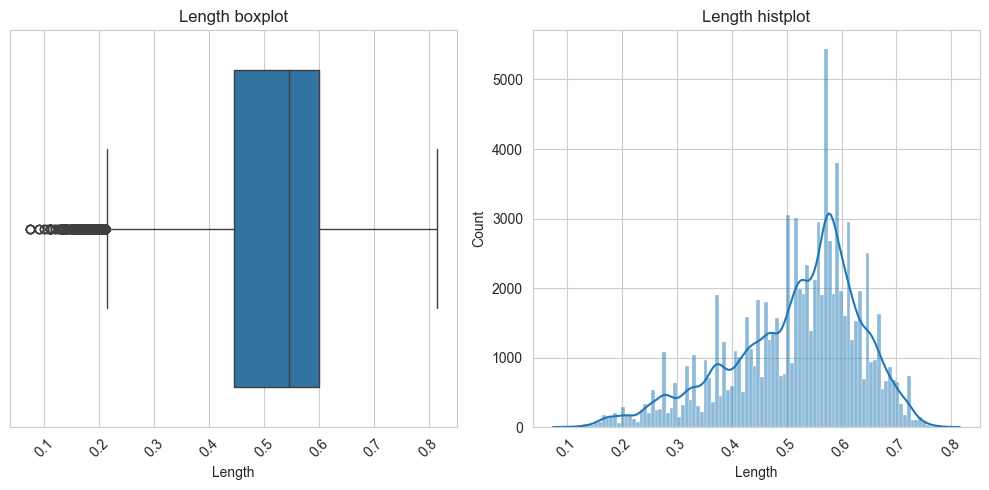

********************  Length values description  ********************


,Length
count,90615.000000
mean,0.517098
std,0.118217
min,0.075000
25%,0.445000
50%,0.545000
75%,0.600000
max,0.815000


********************  Length outliers  ********************
IQR : 0.15499999999999997
****** Lower Outliers ******
Lower outlier count: 1460


,id,Sex,Length,Diameter,Height,Whole weight,Shucked_Weight,Viscera_Weight,Shell weight,Rings
2,2,I,0.160,0.11,0.025,0.0210,0.0055,0.0030,0.005,6
8,8,I,0.205,0.15,0.040,0.0460,0.0145,0.0105,0.010,4
28,28,I,0.180,0.11,0.040,0.0315,0.0105,0.0065,0.005,4






****************************** Diameter analysis ******************************


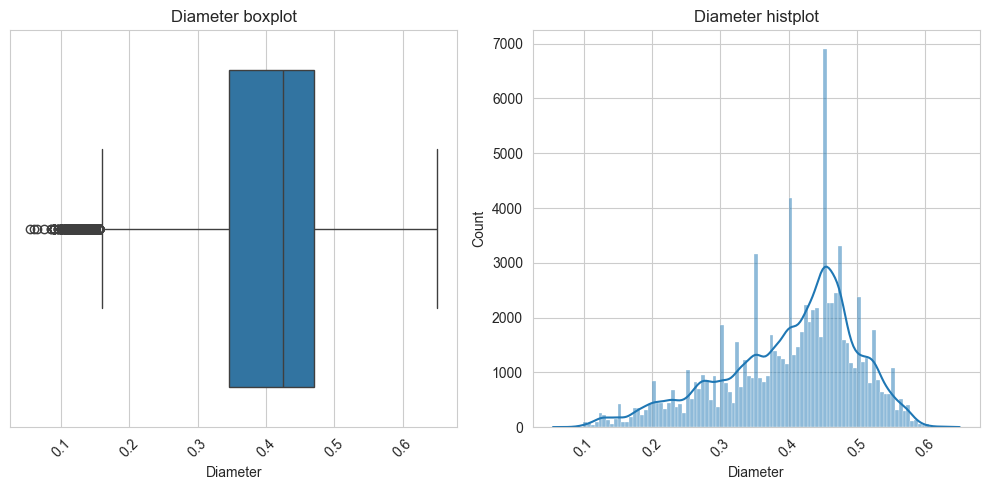

********************  Diameter values description  ********************


,Diameter
count,90615.000000
mean,0.401679
std,0.098026
min,0.055000
25%,0.345000
50%,0.425000
75%,0.470000
max,0.650000


********************  Diameter outliers  ********************
IQR : 0.125
****** Lower Outliers ******
Lower outlier count: 1580


,id,Sex,Length,Diameter,Height,Whole weight,Shucked_Weight,Viscera_Weight,Shell weight,Rings
2,2,I,0.160,0.11,0.025,0.0210,0.0055,0.0030,0.005,6
8,8,I,0.205,0.15,0.040,0.0460,0.0145,0.0105,0.010,4
28,28,I,0.180,0.11,0.040,0.0315,0.0105,0.0065,0.005,4






****************************** Height analysis ******************************


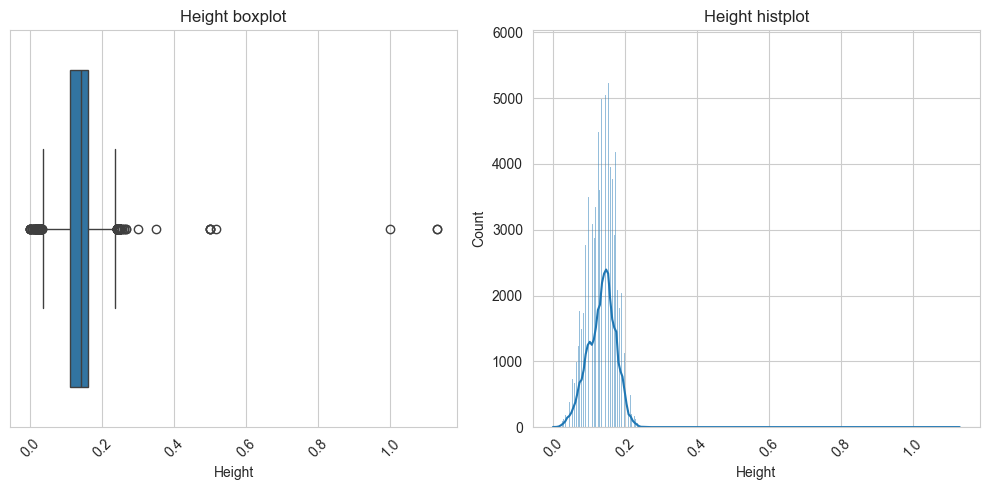

********************  Height values description  ********************


,Height
count,90615.000000
mean,0.135464
std,0.038008
min,0.000000
25%,0.110000
50%,0.140000
75%,0.160000
max,1.130000


********************  Height outliers  ********************
IQR : 0.05
****** Upper Outliers ******
Upper outlier count: 56


,id,Sex,Length,Diameter,Height,Whole weight,Shucked_Weight,Viscera_Weight,Shell weight,Rings
5556,5556,M,0.735,0.565,0.25,1.7775,0.9615,0.4095,0.4050,11
13565,13565,F,0.675,0.520,0.24,1.8730,0.8690,0.3810,0.4045,10
16384,16384,F,0.515,0.375,1.13,0.5720,0.2370,0.1455,0.1500,8


****** Lower Outliers ******
Lower outlier count: 292


,id,Sex,Length,Diameter,Height,Whole weight,Shucked_Weight,Viscera_Weight,Shell weight,Rings
2,2,I,0.160,0.110,0.025,0.0210,0.0055,0.0030,0.005,6
349,349,I,0.155,0.115,0.025,0.0155,0.0065,0.0020,0.005,3
800,800,I,0.185,0.125,0.025,0.0280,0.0095,0.0065,0.009,4






****************************** Whole weight analysis ******************************


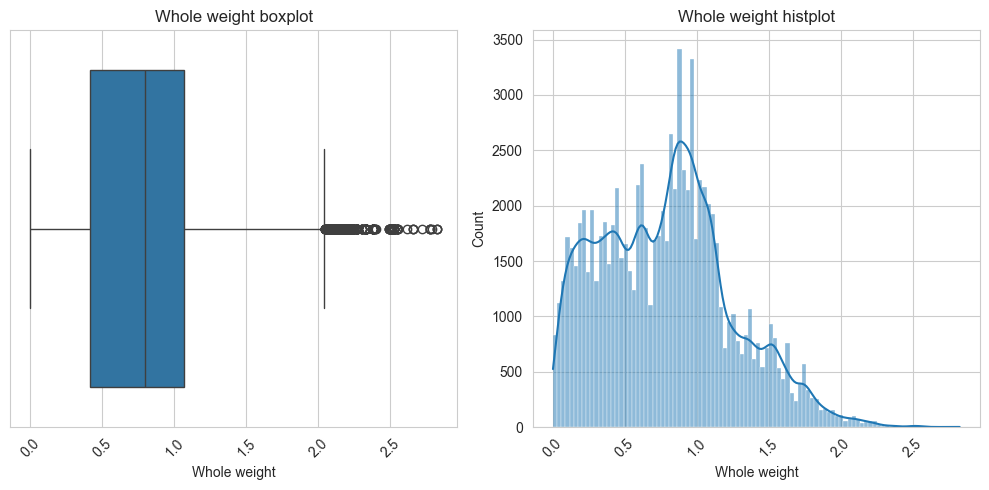

********************  Whole weight values description  ********************


,Whole weight
count,90615.000000
mean,0.789035
std,0.457671
min,0.002000
25%,0.419000
50%,0.799500
75%,1.067500
max,2.825500


********************  Whole weight outliers  ********************
IQR : 0.6484999999999999
****** Upper Outliers ******
Upper outlier count: 574


,id,Sex,Length,Diameter,Height,Whole weight,Shucked_Weight,Viscera_Weight,Shell weight,Rings
649,649,M,0.705,0.570,0.225,2.555,0.8155,0.3115,0.560,13
670,670,F,0.720,0.550,0.210,2.069,0.9205,0.3850,0.601,12
942,942,F,0.765,0.585,0.215,2.173,0.8010,0.4985,0.605,11






****************************** Whole weight.1 analysis ******************************


ValueError: Could not interpret value `Whole weight.1` for `x`. An entry with this name does not appear in `data`.

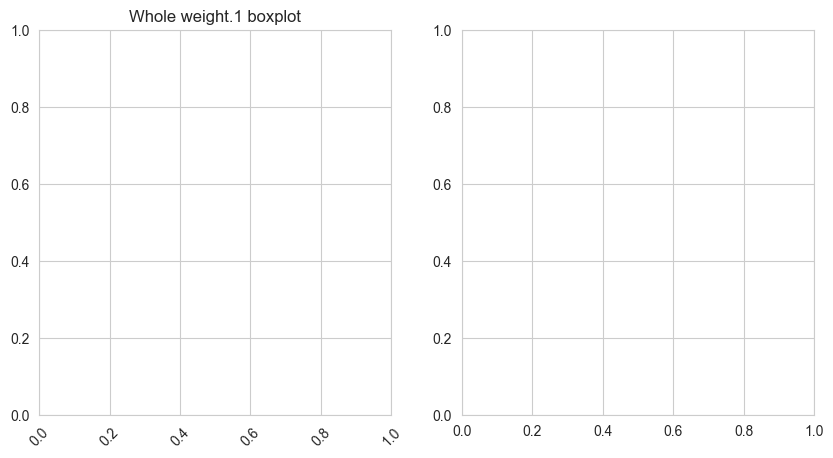

In [28]:
for col in num_cols_to_analyze:
    num_analysis(df,col)

****************************** Sex analysis ******************************
Number of Unique Sex values: 3


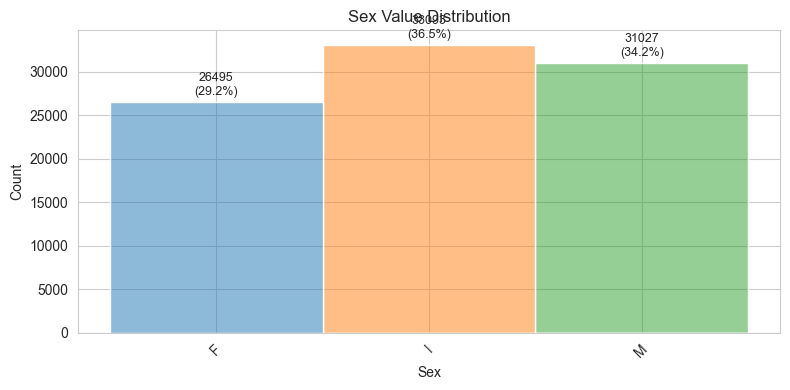

In [29]:
for col in cat_cols:
    categorical_analysis(df,col)

# Observations
1. Lots of outliers but do not appear to be errors
2. Highly skewed data
3. Sex Value should be one-hot-encoded

# Additional Questions
1. How does sex/infancy of the abalone affect weight and number of rings?
2. What is the relationship between all numerical features?
3. At what weight or size do abalones typically mature?
4. Do male or females tend to live longer?
5. What is the relationship between shell weight and age?